## NOAA GHCN Monthly Temperature EDA
#### John Yannotty

This notebook outlines the EDA for the average monthly temperature data obtained form NOAA. The raw temperatures are in hundreth of degress Celcius. To get the temperature back to Celcius, we can divide by 100.

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from tqdm import tqdm 
from shapely import Point

pd.options.mode.chained_assignment = None

### Data Load

In [2]:
datapath = "/home/johnyannotty/NOAA_DATA/ghcnm_v4_01_20230730"
dname = "/ghcnm.tavg.v4.0.1.20230730.qcu.dat"
mdname = "/ghcnm.tavg.v4.0.1.20230730.qcu.inv"

# Read in temperature data
tmp_list = []
with open(datapath+dname,"r") as f:
    for row in tqdm(f):
        tmp = []
        tmp.append(row[0:11]) # Site ID 
        tmp.append(int(row[11:15])) # Year
        for j in range(12):
            tmp.append(int(row[(19+8*j):(24+8*j)]))
        tmp_list.append(tmp)
f.close()

temp_df = pd.DataFrame(tmp_list, columns = ["ID","Year"]+["Month"+str(i) for i in range(1,13)])


1458079it [00:09, 154956.44it/s]


In [3]:
# Read in meta data
md_list = []
with open(datapath+mdname,"r") as fm:
    for row in tqdm(fm):
        md = row.split(" ")
        md = [txt for txt in md if not txt in ["","\n","*\n"]]
        if len(md) == 6:
            print(md)
        md_list.append(md)
fm.close()

meta_df = pd.DataFrame(md_list, columns = ["ID","Lat","Long","Station_Elevation","Station_Name"])


27857it [00:00, 354816.52it/s]


## Global Plots

/tmp/ipykernel_38303/569217505.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


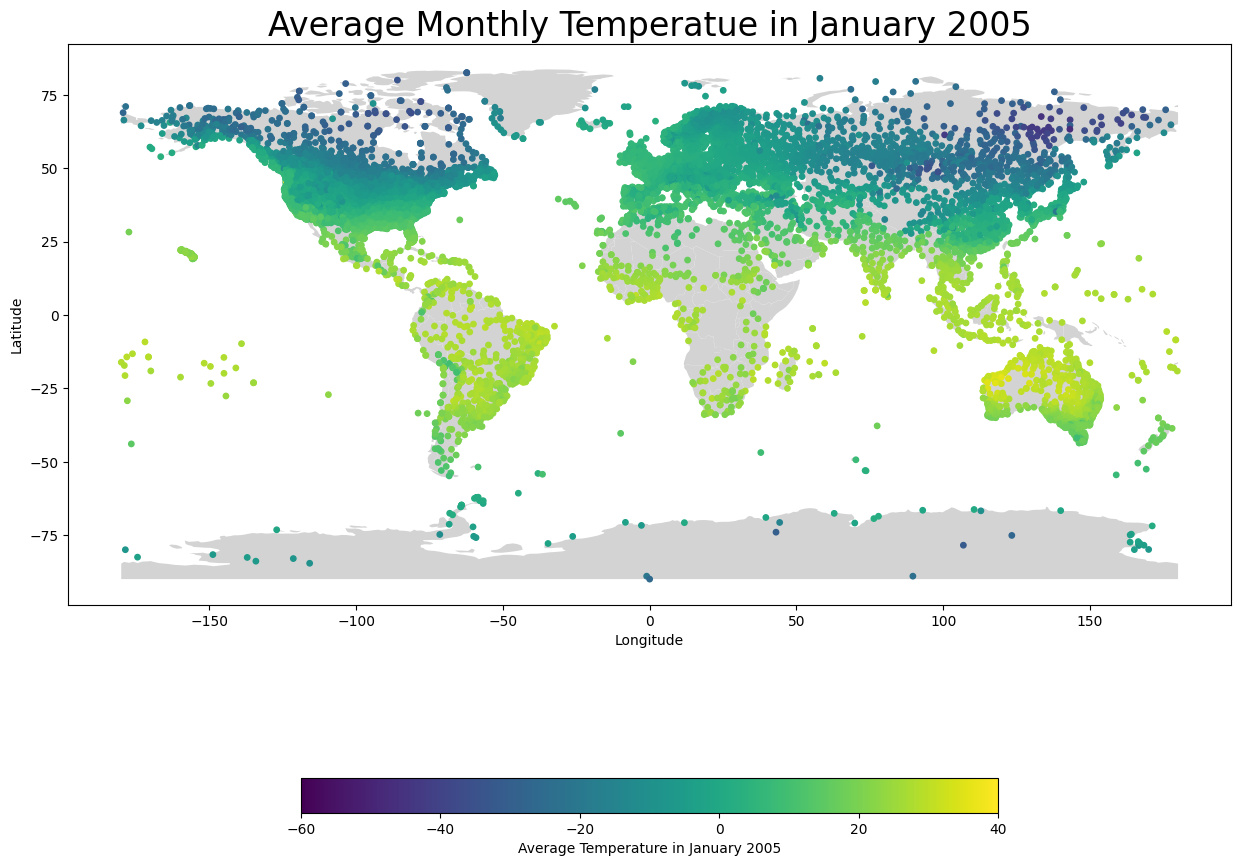

In [5]:
#TODO: Plots, Rescale Temp, bind with location, filter by date, output final df as pickle or csv
yr = 2005
temp_df_sub = temp_df[temp_df["Year"] == yr] 
temp_df_sub.iloc[:,2:] = temp_df_sub.iloc[:,2:]/100 # conver to celcius

temp_yr_geo_df = pd.merge(meta_df,temp_df_sub, on = "ID", how = "right")
temp_yr_geo_df = temp_yr_geo_df[temp_yr_geo_df["Month1"] > -99]
geom = [Point(xy) for xy in zip(temp_yr_geo_df['Long'],temp_yr_geo_df['Lat'])]
gdf = gpd.GeoDataFrame(temp_yr_geo_df, geometry=geom)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf.plot(column = "Month1", marker='o', markersize=15,
         cmap='viridis', legend=True, ax = world.plot(figsize=(15, 15), color = "lightgrey"),vmin = -60, vmax = 40,
         legend_kwds={"label": "Average Temperature in January 2005", "orientation": "horizontal","shrink":0.6}
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Monthly Temperatue in January "+ str(yr), size = 24)
plt.show()


/tmp/ipykernel_38303/3603228166.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


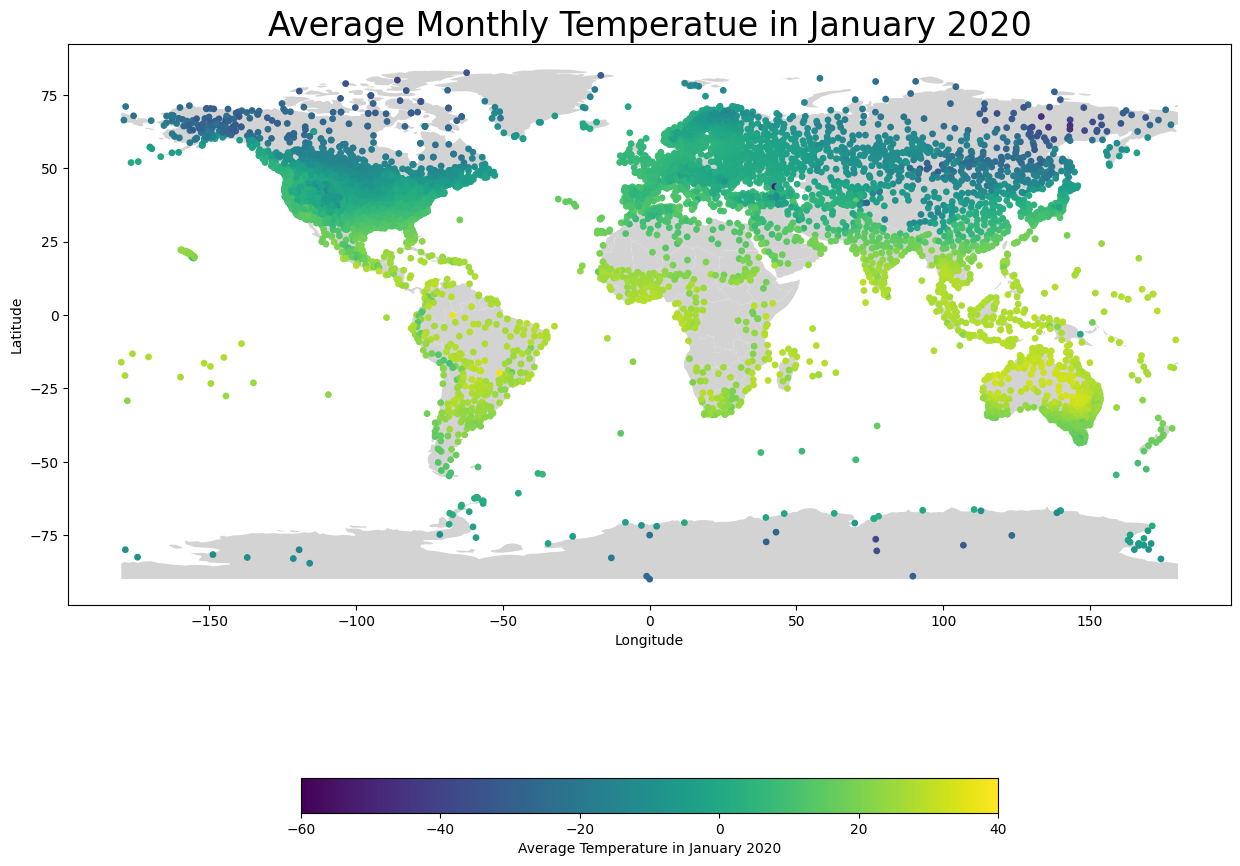

In [6]:
#TODO: Plots, Rescale Temp, bind with location, filter by date, output final df as pickle or csv
yr = 2020
temp_df_sub = temp_df[temp_df["Year"] == yr] 
temp_df_sub.iloc[:,2:] = temp_df_sub.iloc[:,2:]/100 # conver to celcius

temp_yr_geo_df = pd.merge(meta_df,temp_df_sub, on = "ID", how = "right")
temp_yr_geo_df = temp_yr_geo_df[temp_yr_geo_df["Month1"] > -99]
geom = [Point(xy) for xy in zip(temp_yr_geo_df['Long'],temp_yr_geo_df['Lat'])]
gdf = gpd.GeoDataFrame(temp_yr_geo_df, geometry=geom)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf.plot(column = "Month1", marker='o', markersize=15,
         cmap='viridis', legend=True, ax = world.plot(figsize=(15, 15), color = "lightgrey"),vmin = -60, vmax = 40,
         legend_kwds={"label": "Average Temperature in January 2020", "orientation": "horizontal","shrink":0.6}
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Monthly Temperatue in January "+ str(yr), size = 24)
plt.show()


/tmp/ipykernel_38303/835379602.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


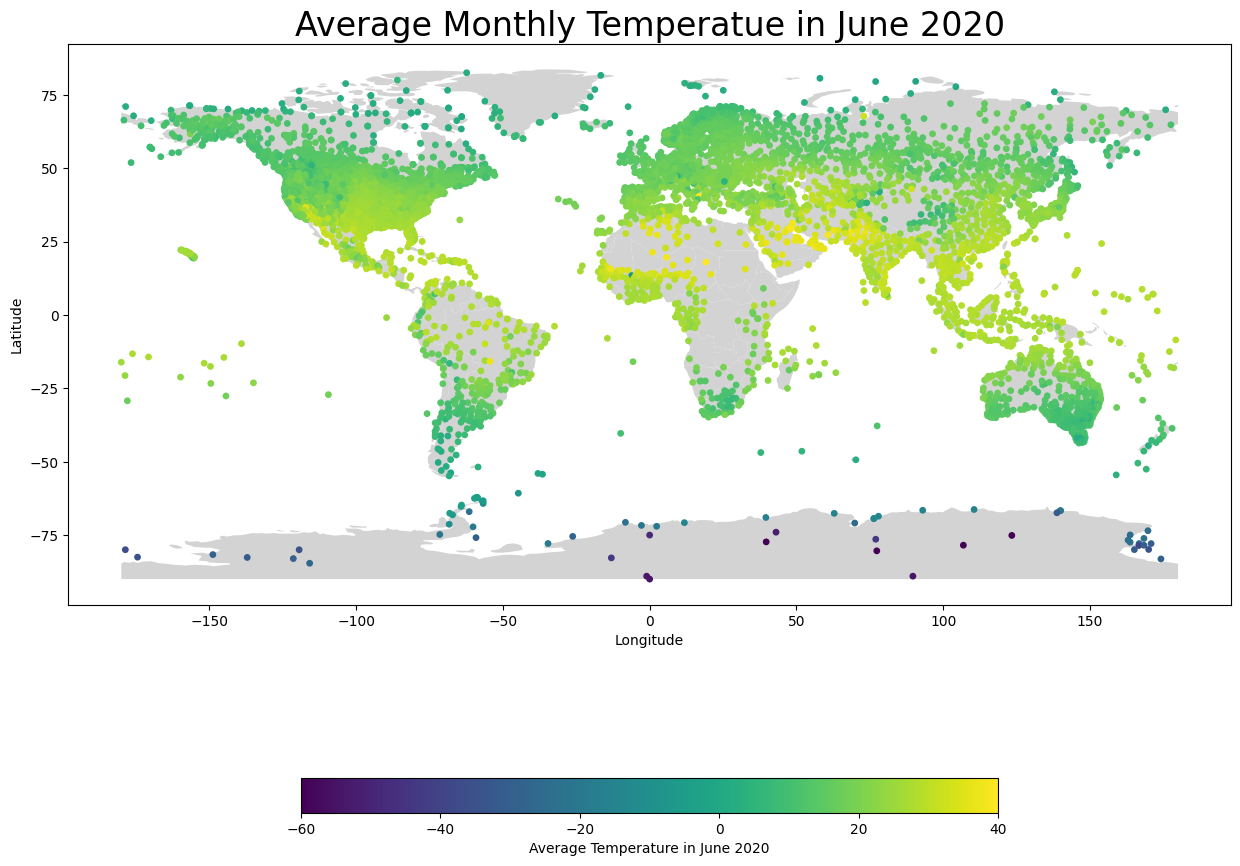

In [8]:
#TODO: Plots, Rescale Temp, bind with location, filter by date, output final df as pickle or csv
yr = 2020
temp_df_sub = temp_df[temp_df["Year"] == yr] 
temp_df_sub.iloc[:,2:] = temp_df_sub.iloc[:,2:]/100 # conver to celcius

temp_yr_geo_df = pd.merge(meta_df,temp_df_sub, on = "ID", how = "right")
temp_yr_geo_df = temp_yr_geo_df[temp_yr_geo_df["Month6"] > -99]
geom = [Point(xy) for xy in zip(temp_yr_geo_df['Long'],temp_yr_geo_df['Lat'])]
gdf = gpd.GeoDataFrame(temp_yr_geo_df, geometry=geom)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf.plot(column = "Month6", marker='o', markersize=15,
         cmap='viridis', legend=True, ax = world.plot(figsize=(15, 15), color = "lightgrey"),vmin = -60, vmax = 40,
         legend_kwds={"label": "Average Temperature in June 2020", "orientation": "horizontal","shrink":0.6}
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Monthly Temperatue in June "+ str(yr), size = 24)
plt.show()

## Location Plots

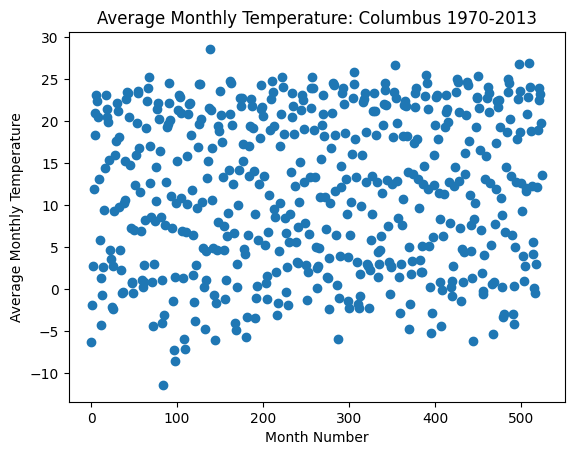

In [19]:
# Plot temperature over time at a given loaction
temp_df.groupby("ID")
temp_df["ID"].nunique()

# Temps from 1970<=
temp_current_df = temp_df[temp_df["Year"] >= 1970]
temp_current_df
columbus = temp_current_df[temp_current_df["ID"] == "USW00093834"]
columbus_data = columbus[["Month"+str(i+1) for i in range(12)]].values.reshape(12*columbus.shape[0])
columbus_data = columbus_data[columbus_data != -9999]
columbus_data = columbus_data/100
#temp_current_df.isna().sum()

plt.scatter(range(columbus_data.size),columbus_data)
plt.xlabel("Month Number")
plt.ylabel("Average Monthly Temperature")
plt.title("Average Monthly Temperature: Columbus 1970-2013")
plt.show()
